# Foundation Badge: modeling Case Script
<br>
Dataset: Data on asking prices for houses, used to predict what the new price for a house will be.  <br>
         This will be done using a linear regression model and XGBoost (optional).<br>
<br>
Some remarks:<br>
    1. This data file has been modified for the purposes of this case<br>
    2. This file offers some directions one can choose from when building a model.  <br>
    3. Comments in the code are indicated with '#'. Do also read those parts to understand the code<br>

# Phase I: DATA SELECTION AND PREPERATION

## Step 1: Install/Load Packages (Just run the code below, no further action needed)

When you are coding, you will usually need packages to help you with data analytics. These packages contain tools to actually do the analytics, like linear regression.

In [1]:
## This part will load the required packages for the calculations. These packages include standard functions.

# a) Install packages
import pandas as pd       # 'as' := we abbreviate the package for common use
import numpy as np
import seaborn as sns
import random
import os
import math
import matplotlib.pyplot as plt 
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import xgboost as xgb

from sklearn.metrics import confusion_matrix 
import itertools
from sklearn.metrics import accuracy_score 
from sklearn import metrics #ROC curve

#    Define function for the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

## Step 2: Load data

Here we will load the data of the houses. Have a look at the different attributes of the houses.

In [2]:
# Set Work Space with the package os. Depends on your default settings whether to use forward ('/') or back slash ('\')
os.chdir(r"N:\MIacademy\Modules nieuw\Masterfiles\AI for Business - BADGE PORTFOLIO\01. AI Foundation (HR)\Trainingsmateriaal\Day 1\Househunter case")

# Read file
inputdata = pd.read_csv("101 Househunters - Data - Foundation.csv", delimiter=',')

inputdata_orig = inputdata.copy() #save an original copy of the file, so that the unaltered data is stored
inputdata.head()                  #check what the first few lines of your data look like. Note that not all variables are shown.

,ID,Price,Province,HouseType,ConstructionYear,LivingArea_m2,Garden,Balcony,Attic,StatusRank,StatusScore,Avg_property_value_m2,Avg_property_value_per_House
0,2684219,178082,Zeeland,Semidetached,2017,120.0,1,0,0,2233,-0.15,1698.226212,203787.1454
1,2681978,241403,FryslÃ¢n,Detached,1930,71.0,0,0,0,2899,-0.84,1695.027593,120346.9591
2,2684837,277145,Overijssel,Detached,1993,90.0,0,0,0,2944,-0.92,1668.157895,150134.2105
3,2684859,112522,Zeeland,Semidetached,1920,102.0,0,0,0,2758,-0.66,1100.000000,112200.0000
4,2675023,93746,Drenthe,TownHouse,1969,56.0,0,0,0,2367,-0.27,1250.000000,70000.0000


##  Step 3: Assemble key number(s) to understand the data available 

You can already get some general data from the data, like the mean, min, max, etc. The real analysis happens in the next phase with visualizations.

In [3]:
#      You can select certain columns you want to have displayed by their summary, which includes the min/max,count,mean,std, and percentiles
print('This function shows the number of (rows, columns):', inputdata.shape) 

print('The average asking price is:', inputdata['Price'].mean()) 

print('The ratio amount of gardens is:', inputdata['Garden'].mean()) #Choose variable from step 3 and replace 'Garden' with the chosen variable if you want to explore

This function shows the number of (rows, columns): (3667, 13)
The average asking price is: 335594.1892555222
The ratio amount of gardens is: 0.6476683937823834


# Phase II: ANALYSIS PHASE

This is where you lay the fundament for your model: what variables do you think will predict your target variable? <br>
Try and figure out structures in the data by exploring it. We will guide you step by step through this process. <br>

Suggestions for variables are in this script, but feel free to find different relationships as well.

## Step 4: Perform a profile analysis on your target variable

Try to get an idea for the average profile of different asking price


In [4]:
Variable_profile = 'Garden' # Choose any variable you like

profile = [
     Variable_profile  
    , 'Price'
]

inputdata[profile].groupby(Variable_profile).mean()

,Price
Garden,
0,282078.270124
1,364706.849263


## Step 5: Perform some explorative analysis

Here, we will create different kinds of visual plots, so we can explore the data easier. It is always good to visualize the data in this way, because it is easier to see visual patterns.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


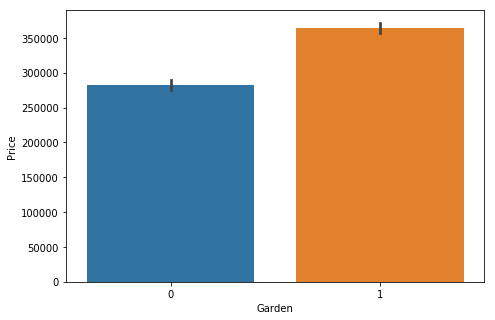

In [5]:
#    Create barplot for two variables
# You can choose another variable, but 'Garden' is already given

Barplot_Y = 'Price'
Barplot_X = 'Garden'

plt.figure(figsize=(7.5,5))
sns.barplot(inputdata[Barplot_X], inputdata[Barplot_Y])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


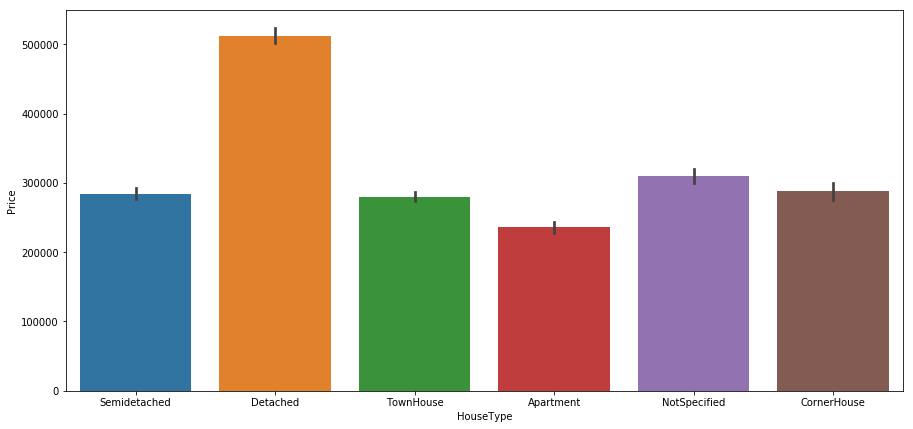

In [6]:
#    Create barplot for categorical variables 
# Choose a different variable. Housetype is an option already given

Barplot_categorical_Y = 'Price'
Barplot_categorical_X = 'HouseType'

plt.figure(figsize=(15,7))
sns.barplot(inputdata[Barplot_categorical_X],inputdata[Barplot_categorical_Y])

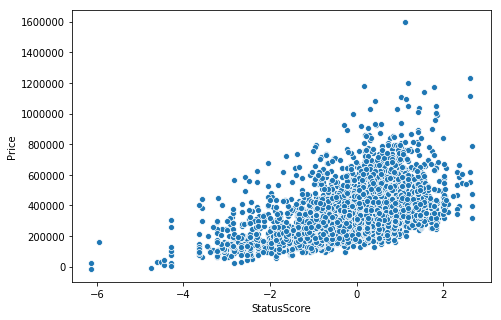

In [7]:
#    Create scatter plot
# Scatter plots are excellent for continuous data. Statusscore is picked here as the variable, but feel free to change it

Scatterplot_Y = 'Price' 
Scatterplot_X = 'StatusScore'

plt.figure(figsize=(7.5,5))
sns.scatterplot(inputdata[Scatterplot_X], inputdata[Scatterplot_Y])

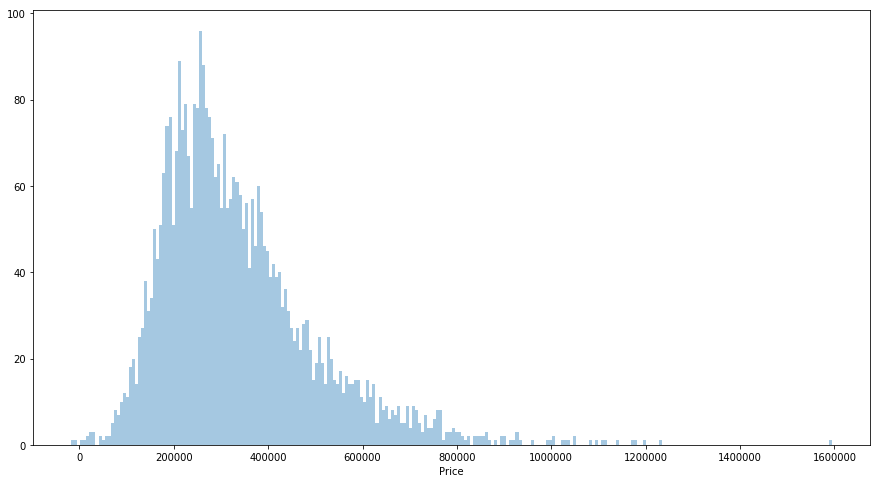

In [8]:
#    Create distribution plot
#  Distribution plots are great for visualizing one variable, like price. 
    
plt.figure(figsize=(15,8))
sns.distplot(inputdata['Price'],bins=250, kde=False)

## Step 6: Produce a cross-correlation matrix to detect relations

Let's see what the columns were again

In [9]:
inputdata.columns

Index(['ID', 'Price', 'Province', 'HouseType', 'ConstructionYear',
       'LivingArea_m2', 'Garden', 'Balcony', 'Attic', 'StatusRank',
       'StatusScore', 'Avg_property_value_m2', 'Avg_property_value_per_House'],
      dtype='object')

We want to visualize the correlation between numerical values.<br>
This heatmap is symmetrical and has 1's on the diagonal; each variable correlates perfectly (1:1) with itself.<br>
What variables are correlated to our target variable?<br>
<br>
Rule of thumb: everything with a higher correlation-value than 0.3 (or lower than -0.3),
has a substantial influence on each other.



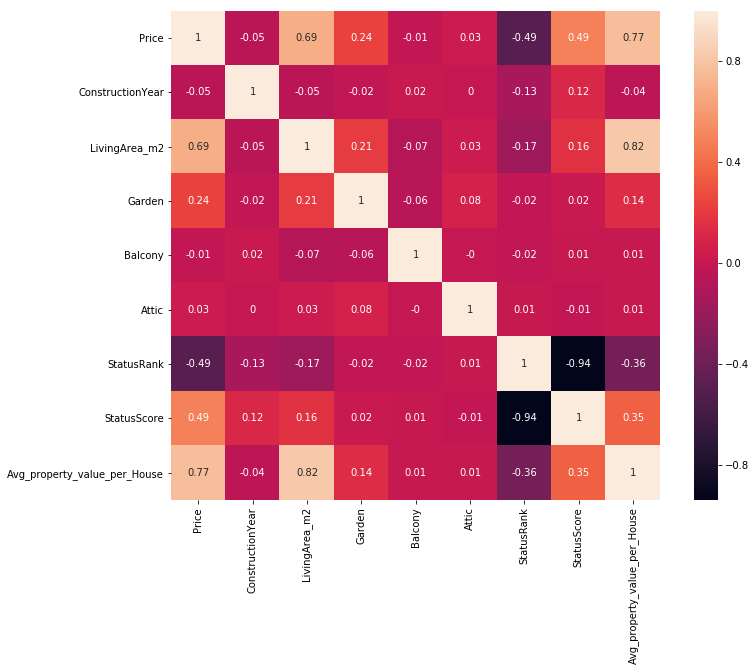

In [12]:
# Because a large number of variables will yield a chaotic, hardly readable heatmap, select a few variables for which
# to construct the heat-map. You can adjust these variables yourself by commenting out what you do not want displaid.

columns = ['Price', 
            'Province', 
            'HouseType', 
            'ConstructionYear',
            'LivingArea_m2', 
            'Garden', 
            'Balcony', 
            'Attic', 
            'StatusRank',
            'StatusScore', 
            'Avg_property_value_per_House'
          ]

correlation = inputdata[columns]
corrmat = correlation.corr().round(2)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

### 3 Insights from the data visualization (Can you see more?):
1. Price is mostly correlated with Avg_WOZ_per_House <br>
2. StatusRank and StatusScore have a high negative correlation <br>
3. ConstructionYear and price are not correlated

# Phase III: MODEL SELECTION AND OPTIMIZATION

## Step 7: Dummify categorical variables

If we have categorical variables in our list, these need to be converted to numerical labels in order to include them
in any model. That is, we need to 'dummify' the categorical variables.

In [13]:
#NOTE: You should only run this cell ONCE for every categorical variable 
#      without getting an error. If you run it a second time and you get the error,
#      don't worry. You can just continue, nothing was changed in your data.


#    Get/add dummies
categoricals = ['Province'
                ,'HouseType'
               ]
inputdata = pd.get_dummies(inputdata, columns=categoricals)
inputdata.head()

,ID,Price,ConstructionYear,LivingArea_m2,Garden,Balcony,Attic,StatusRank,StatusScore,Avg_property_value_m2,...,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid Holland,HouseType_Apartment,HouseType_CornerHouse,HouseType_Detached,HouseType_NotSpecified,HouseType_Semidetached,HouseType_TownHouse
0,2684219,178082,2017,120.0,1,0,0,2233,-0.15,1698.226212,...,0,0,1,0,0,0,0,0,1,0
1,2681978,241403,1930,71.0,0,0,0,2899,-0.84,1695.027593,...,0,0,0,0,0,0,1,0,0,0
2,2684837,277145,1993,90.0,0,0,0,2944,-0.92,1668.157895,...,1,0,0,0,0,0,1,0,0,0
3,2684859,112522,1920,102.0,0,0,0,2758,-0.66,1100.000000,...,0,0,1,0,0,0,0,0,1,0
4,2675023,93746,1969,56.0,0,0,0,2367,-0.27,1250.000000,...,0,0,0,0,0,0,0,0,0,1


## Step 8: Create a train / test set

 For model training, we split the data in training and validation set.<br>
 The training set will be the base for creating the model, the validation/test set will be used to check the performance of your model on new data.

In [14]:

trainset, testset = train_test_split(inputdata, test_size=0.3, random_state=13)
print(inputdata.shape)  #print number of rows and columns in inputdata
print(trainset.shape) #print number of rows and columns in trainset   
print(testset.shape)  #print number of rows and columns in testset

(3667, 29)
(2566, 29)
(1101, 29)


## Step 9: Select the variables to include in the model 

We want to see our new columns, so let's print it

In [15]:
trainset.columns

Index(['ID', 'Price', 'ConstructionYear', 'LivingArea_m2', 'Garden', 'Balcony',
       'Attic', 'StatusRank', 'StatusScore', 'Avg_property_value_m2',
       'Avg_property_value_per_House', 'Province_Drenthe',
       'Province_Flevoland', 'Province_FryslÃ¢n', 'Province_Gelderland',
       'Province_Groningen', 'Province_Limburg', 'Province_Noord Brabant',
       'Province_Noord Holland', 'Province_Overijssel', 'Province_Utrecht',
       'Province_Zeeland', 'Province_Zuid Holland', 'HouseType_Apartment',
       'HouseType_CornerHouse', 'HouseType_Detached', 'HouseType_NotSpecified',
       'HouseType_Semidetached', 'HouseType_TownHouse'],
      dtype='object')

Choose variables from above and remove the variables in the x_variables. The variables that you select will be used to make a linear regression. Try to find the best 6 variables to use instead of all the variables.

In [16]:
# Fill the variables in here:     (Note: there should be no comma before the first variable)
# Remove the variables untill 6 are left and try to find the best 6 variables.
x_variables = [ 
                'LivingArea_m2'
                ,'ConstructionYear'
                ,'Garden'
                ,'Balcony'
                ,'Attic'
                ,'StatusRank'
                ,'StatusScore'
                ,'Avg_property_value_m2'
                ,'Avg_property_value_per_House'
                ,'Province_Drenthe'
                ,'Province_Flevoland'
                ,'Province_FryslÃ¢n'
                ,'Province_Gelderland'
                ,'Province_Groningen' 
                ,'Province_Limburg'
                ,'Province_Noord Brabant'
                ,'Province_Noord Holland' 
                ,'Province_Overijssel'
                ,'Province_Utrecht'
                ,'Province_Zeeland' 
                ,'Province_Zuid Holland'
                ,'HouseType_Apartment'
                ,'HouseType_CornerHouse'
                ,'HouseType_Detached'
                ,'HouseType_NotSpecified'
                ,'HouseType_Semidetached'
                ,'HouseType_TownHouse'
          ]


# Select the data in the train and test sets of the previously defined variables
X_train = trainset[x_variables]
X_test = testset[x_variables]

# Select the data in the train and test sets of the target variable
y_train = trainset['Price']
y_test = testset['Price']

## Step 10: Build a Linear Regression model 

Now that we have got all our data, we can make a regression (yay)! The code below trains a model and shows a plot for the prediction. Think about what information the final plot gives you.  

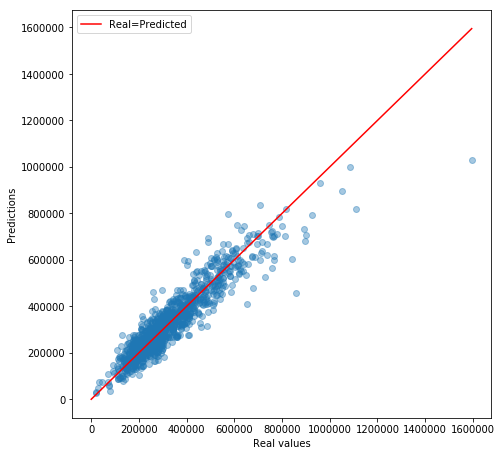

In [17]:
# a) Train the model using the training sets
X_train_incl_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_incl_constant)
results = model.fit()


# b) Make predictions for the test set. Don't worry about all the code
X_test_incl_constant = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_incl_constant)
X_train_incl_constant = sm.add_constant(X_train)
y_train_pred = results.predict(X_train_incl_constant)
plt.figure(figsize=(7.5,7.5))
plt.scatter(y_test, y_test_pred, alpha=0.4, marker='o')
plt.plot((0, max(y_test)), (0, max(y_test)), 'r-', label='Real=Predicted')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.legend(loc='upper left')


#### What does this plot tell you?

# Phase IV: VALIDATE

## Step 11: Evaluate the model using P-values, R-squared and MAPE

When we have a final result (here the prediction plot), we also always want statistics about our outcome. The statistics are usually even more important! Here we print Three statistics, Regression summary, R-squared and MAPE. 

In [19]:
# Model evaluation for the test set
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_test_pred))
#In the summary report we can review many statistics.
#Focus on 2 statistics:
#1. R-squared (Upper right corner of the report)
#2. P>|t| in the middle table, for each variable. this is the P-value
print(results.summary())

Mean absolute percentage error: 14.79
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     656.7
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:00:42   Log-Likelihood:                -31887.
No. Observations:                2566   AIC:                         6.383e+04
Df Residuals:                    2540   BIC:                         6.398e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

# Phase V: MODEL XGBoost

We can do the same process for another model instead of linear regression. Linear regression is not the best regression model there is. Therefore, we can use XGBoost, a better regression model. Pay attention to the difference in outcome and statistics compared to the linear regression.

Have a look at the column variables again

In [20]:
inputdata.columns

Index(['ID', 'Price', 'ConstructionYear', 'LivingArea_m2', 'Garden', 'Balcony',
       'Attic', 'StatusRank', 'StatusScore', 'Avg_property_value_m2',
       'Avg_property_value_per_House', 'Province_Drenthe',
       'Province_Flevoland', 'Province_FryslÃ¢n', 'Province_Gelderland',
       'Province_Groningen', 'Province_Limburg', 'Province_Noord Brabant',
       'Province_Noord Holland', 'Province_Overijssel', 'Province_Utrecht',
       'Province_Zeeland', 'Province_Zuid Holland', 'HouseType_Apartment',
       'HouseType_CornerHouse', 'HouseType_Detached', 'HouseType_NotSpecified',
       'HouseType_Semidetached', 'HouseType_TownHouse'],
      dtype='object')

Pick the variables you want to use. Recommended is that you use the same variables.

In [21]:
# Fill the variables in here:     (Note: there should be no comma before the first variable)
# Remove the variables untill 6 are left and try to find the best 6 variables.
x_variables_xgboost = [ 
                'LivingArea_m2'
                ,'ConstructionYear'
                ,'Garden'
                ,'Balcony'
                ,'Attic'
                ,'StatusRank'
                ,'StatusScore'
                ,'Avg_property_value_m2'
                ,'Avg_property_value_per_House'
                ,'Province_Drenthe'
                ,'Province_Flevoland'
                ,'Province_FryslÃ¢n'
                ,'Province_Gelderland'
                ,'Province_Groningen' 
                ,'Province_Limburg'
                ,'Province_Noord Brabant'
                ,'Province_Noord Holland' 
                ,'Province_Overijssel'
                ,'Province_Utrecht'
                ,'Province_Zeeland' 
                ,'Province_Zuid Holland'
                ,'HouseType_Apartment'
                ,'HouseType_CornerHouse'
                ,'HouseType_Detached'
                ,'HouseType_NotSpecified'
                ,'HouseType_Semidetached'
                ,'HouseType_TownHouse'
          ]

# Select the data in the train and test sets of the previously defined variables
X_train_xgboost = trainset[x_variables_xgboost]
X_test_xgboost = testset[x_variables_xgboost]

# Select the data in the train and test sets of the target variable
y_train_xgboost = trainset['Price']
y_test_xgboost = testset['Price']

We can train our model now and plot the prediction. Another cool thing you can do with XGBoost is plot the feature importance. This tells you which column variables are most important in the prediction.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


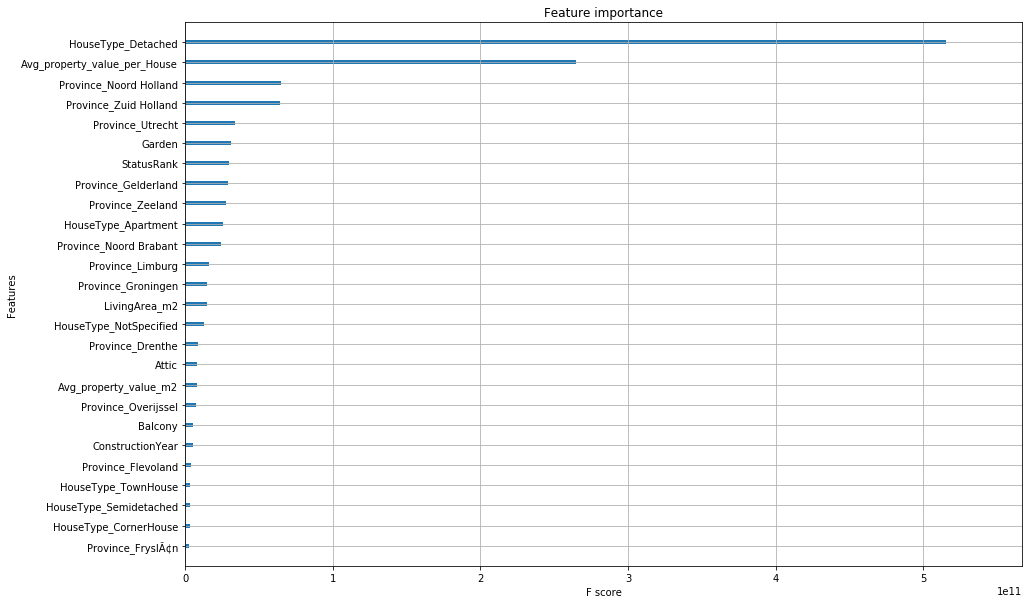

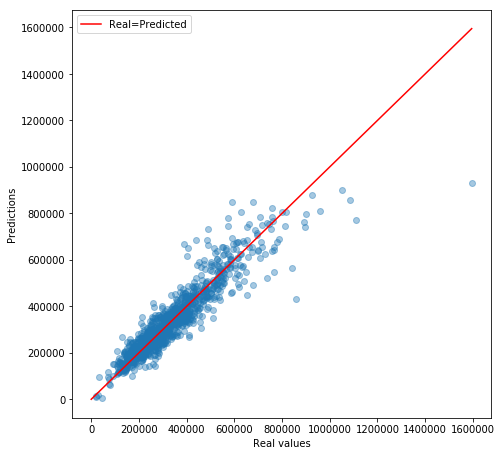

In [22]:
# a) Train the model using the training sets
bst = xgb.XGBRegressor(max_depth=5
                      ,min_child_weight=1
                      ,gamma=0
                      ,subsample=1
                      ,colsample_bytree=1
                      ,learning_rate=0.1
                      ,silent=1
                      ,n_estimators=200)
bst.fit(X_train_xgboost, y_train_xgboost)

# b) Plot feature importances
fig, ax = plt.subplots(figsize=(15,10))
xgb.plot_importance(bst, importance_type='gain', show_values=False, ax=ax)

# c) Make predictions for the test set
y_test_pred_xgboost = bst.predict(X_test_xgboost)
plt.figure(figsize=(7.5,7.5))
plt.scatter(y_test_xgboost, y_test_pred_xgboost, alpha=0.4, marker='o')
plt.plot((0, max(y_test_xgboost)), (0, max(y_test_xgboost)), 'r-', label='Real=Predicted')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.legend(loc='upper left')

In [23]:
# Model evaluation for the test set
print("R-squared: %.3f" % r2_score(y_test_xgboost, y_test_pred_xgboost))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test_xgboost, y_test_pred_xgboost))

R-squared: 0.859
Mean absolute percentage error: 12.88


#### Can you see any differences compared to the linear regression model?